##**PROJECT 1**                            

# **CUSTOMER SEGMENTATION**

**Customer segnementation is the process of the dividing the coustomers based  on shared characteristics and groping them into one cluster like location,dress colurs,habbits,payment etc   
This help to improve the sales of the store and we find out the bussines releated problems and  improve customer experience, and optimize product offerings...**

### **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

--> Here we have the `excel file` so we are reading the data in the excel formate

In [ ]:
df=pd.read_excel("/content/marketing_campaign1.xlsx")
df.shape # which is use to check the no rows and the columns

(2240, 29)

From the above given data there are the `2240 ROWS` and the `29 COLUMNS`

In [ ]:
df.head() # which is use to check the first 5 rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail() # which is use to check the last 5 rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.columns # checking for the columns names

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.isnull().sum().sum()

np.int64(24)

We have detected `24 null` values in the Income column  
 We can either `impute` these null values or `drop` them, depending on the requirement and the percentage of missing values in the dataset.

we can delete the null values when ther is less than `5%` or we need to impute them

In [ ]:

#calculate missing value by count
missing_count=df.isnull().sum()

#calculate missing value by count into percentage
missing_per =(missing_count/len(df))*100

# Giving the Title for the data frame

print("\033[3m"+"\033[32m" + "Checking the percentage of the missing values" + "\033[36m \n\n")

# creating the data frame for the missing count and the missin values percentage%

missing_stats=pd.DataFrame({"Missing_count":missing_count,"Missing per%":missing_per}).sort_values(by="Missing_count", ascending=False)

print(missing_stats)



Checking the percentage of the missing values 


                     Missing_count  Missing per%
Income                          24      1.071429
ID                               0      0.000000
Year_Birth                       0      0.000000
Education                        0      0.000000
Marital_Status                   0      0.000000
Kidhome                          0      0.000000
Teenhome                         0      0.000000
Dt_Customer                      0      0.000000
Recency                          0      0.000000
MntWines                         0      0.000000
MntFruits                        0      0.000000
MntMeatProducts                  0      0.000000
MntFishProducts                  0      0.000000
MntSweetProducts                 0      0.000000
MntGoldProds                     0      0.000000
NumDealsPurchases                0      0.000000
NumWebPurchases                  0      0.000000
NumCatalogPurchases              0      0.000000
NumStorePurchases   

From the above information we conclude that the there is a very small persentage `1.071429%` of the missing values and it is only in the one column so we can delete that null values

**We are going to delete the null values from the data**

In [ ]:
# droping the null values in the origional data by keeping inplace= True
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
# here we dont see any null values
df.isnull().sum().sum()

np.int64(0)

 **Checking for the duplicate in the data**

In [ ]:
# duplicates
duplicate=df.duplicated().sum()
print("\033[36m"f"The duplicates in the data is :{duplicate}"+"\033[4m")

The duplicates in the data is :0


The data is cointaining the `0` duplicated values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

## **Stastical Analysis**

In [ ]:
#stastical
df.drop(columns=['Dt_Customer']).describe().T
# here we are dropping the Dt_Customer beacause it is in the date formate

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [ ]:
df.drop(columns=['ID','Dt_Customer', 'Z_CostContact', 'Z_Revenue',
                      'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'],axis=1,inplace=True)


### **Reason for dropping this columns**  
**ID**: In this column there is all unique values   
**Dt_Customer**: Date of enrollment, not useful in clustering  
**Z_CostContact**: Constant value, not useful for clustering.  
**Z_Revenue**: Constant value, not useful for clustering.
**Complain**: Binary (0/1), not relevant for customer grouping but we can use this for the logestic regression  
**AcceptedCmp1 to AcceptedCmp5 because they**:  
=> Don’t define customer inherent behavior  
=> May bias clusters toward campaign-based groups  
=> Are redundant if Response is used  
=> Are binary, which is less useful for   distance-based clustering


In [ ]:
df.shape

(2216, 20)

**Value count**

In [ ]:
unique = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique.append(x)

print("\033[36m"+"Checking for the unique values in the data.."+"\033[3m \n")

pd.DataFrame(index = df.columns, columns = ["Total no of unique Values"])

Checking for the unique values in the data.. 



,Total no of unique Values
Year_Birth,NaN
Education,NaN
Marital_Status,NaN
Income,NaN
Kidhome,NaN
Teenhome,NaN
Recency,NaN
MntWines,NaN
MntFruits,NaN
MntMeatProducts,NaN


In [ ]:
df['MntWines'].sum()

np.int64(676083)

# **Vissualization**

**Spending the their income according to the categorical wise**

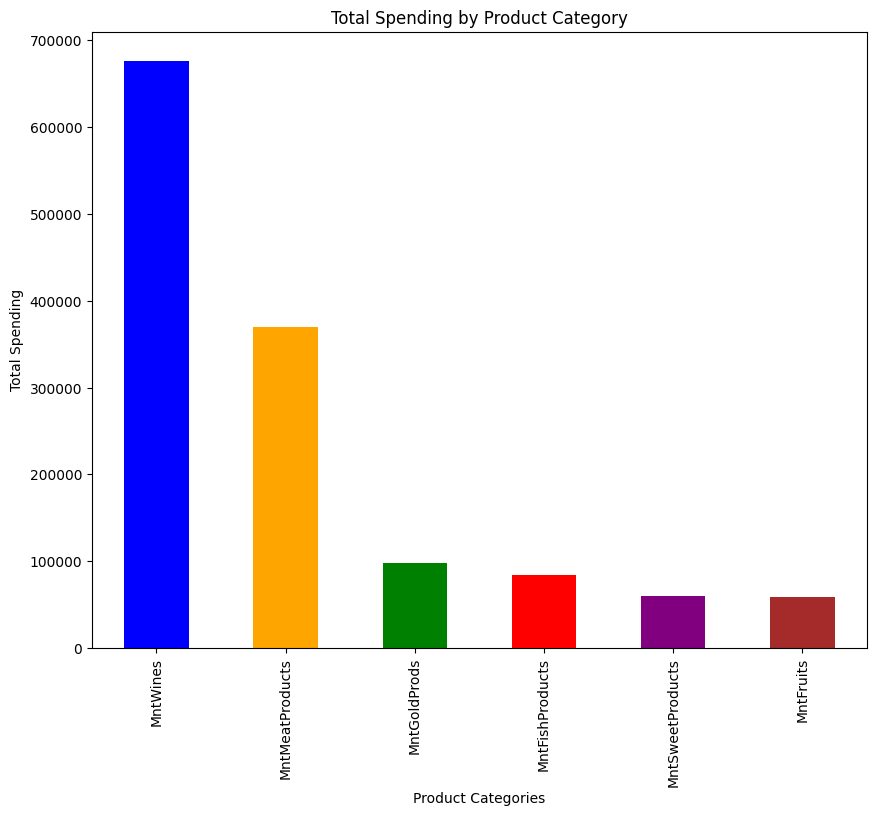

In [ ]:
plt.figure(figsize=(10,8))
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending_cols].sum().sort_values(ascending=False).plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel("Product Categories")
plt.ylabel("Total Spending")
plt.title("Total Spending by Product Category")
plt.show()

--->**We have seen from the above vissual that the  people are spending more their `income` on the `Wines` instead of spending on the other products**    
--->**By this we can conclude that the there are more people in this who is consumming the wine more than other products like `meat`,`gold`,`fish`,`wheet`,`fruits`**  

---> The least product are the `fruits`  
--->We can say that the there are more `unhealthy` people


**Income Distribution by Marital Status**

In [ ]:
# checking for the colours in the palettes
print(sns.palettes.SEABORN_PALETTES.keys())

dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])


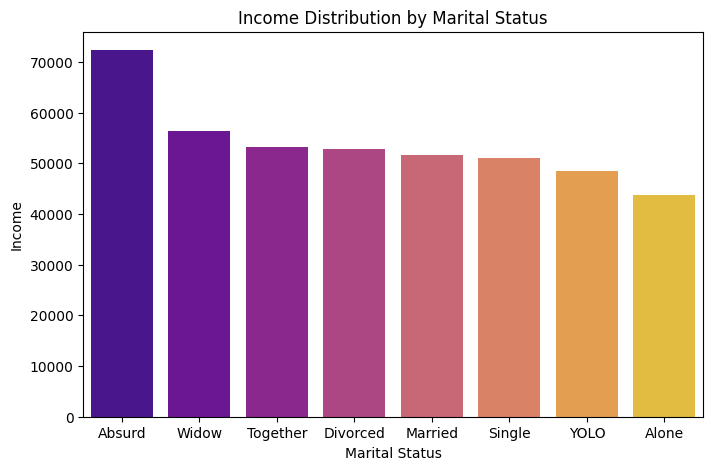

In [ ]:
plt.figure(figsize=(8,5))
data_sorted = df.groupby('Marital_Status')['Income'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Marital_Status', y='Income', data=data_sorted,palette="plasma")
plt.xlabel("Marital Status")
plt.ylabel("Income")
plt.title("Income Distribution by Marital Status")
plt.show()

In [ ]:
print("\033[31m"+"Average Income range according to the Marital Status\n")
print("\033[36m"+f"{data_sorted}")

Average Income range according to the Marital Status

  Marital_Status        Income
0         Absurd  72365.500000
1          Widow  56481.552632
2       Together  53245.534031
3       Divorced  52834.228448
4        Married  51724.978996
5         Single  50995.350318
6           YOLO  48432.000000
7          Alone  43789.000000


---> From the above graph we can observe that the `Absured` are getting the high income compare to the other catogery  
--->Who are the `Alone` they are earning less amount compare to the other catogery in the data beacause they are not any `spendings` and they dont have any `expendicuture`    
---> Other category people are earning medium which means `average`  

**Age Distribution of Customers**

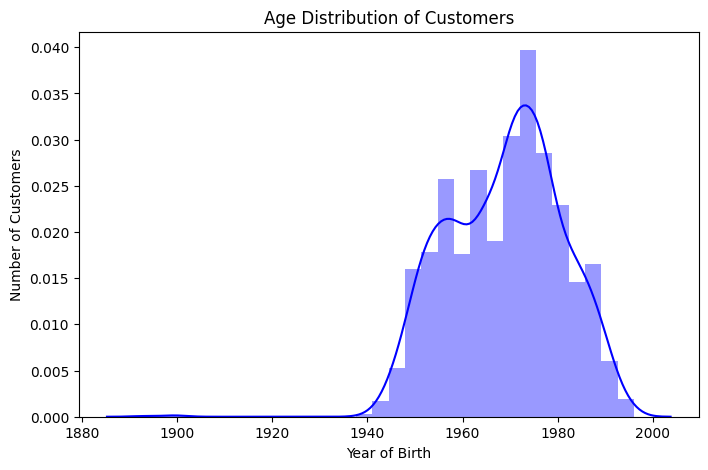

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df['Year_Birth'], bins=30, kde=True, color="blue")
plt.xlabel("Year of Birth")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.show()

---> We can see from the above histplot that the most of the people are born in between `1960` to `1980`  
--->Where the data is also `normally distributed` according to the histplot.There are some diflection but it look more revelent to the normal distribution

Eduacation level vs income

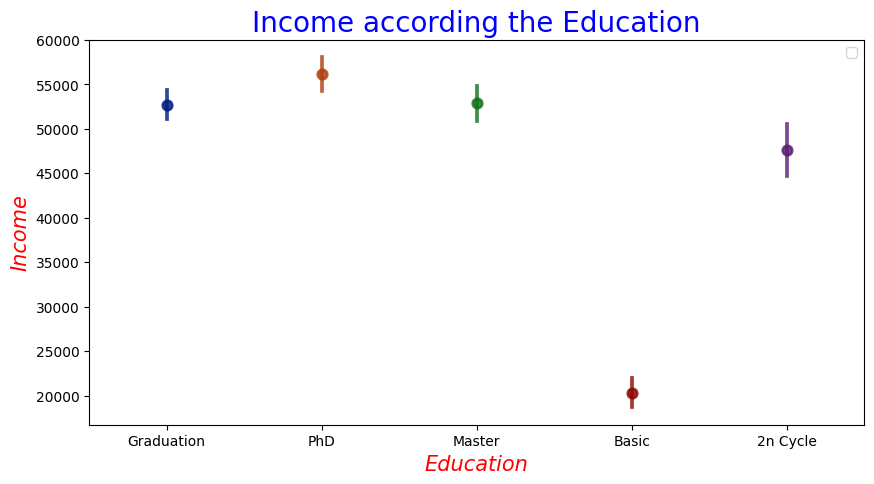

In [ ]:
# point plot
# checking the average income of the people according to the education level
plt.figure(figsize=(10,5))
sns.pointplot(x='Education', y='Income', data=df,palette="dark", alpha=0.8)
plt.xlabel('Education', fontsize=15, color='red',style='italic')
plt.ylabel('Income', fontsize=15, color='red',style='italic')
plt.title('Income according the Education', fontsize=20, color='blue')
plt.legend()
plt.show()

In [ ]:
Education_level= df.groupby('Education')['Income'].mean().sort_values(ascending=False).reset_index()
print("\033[31m"+"Average Income range according to the Education level\n")
print("\033[32m"+f"{Education_level}"+"\033[5m")


Average Income range according to the Education level

    Education        Income
0         PhD  56145.313929
1      Master  52917.534247
2  Graduation  52720.373656
3    2n Cycle  47633.190000
4       Basic  20306.259259


--->We can see that the according to the `Eduacation` level how they are earnig `Income`  
---> We can see that the `PHD` people are earning more than other people the avg income of the PHD is `56145`  
--->least from the Education is that the `Basic` which is the `20306`


**Spending Money According To The `Age`,`Income` And The `Wine`**

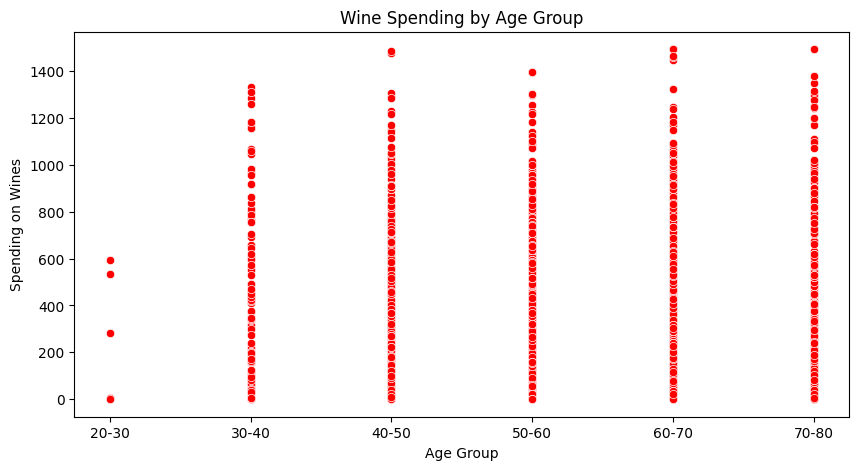

In [ ]:
df['Age'] = 2025 - df['Year_Birth']
age_groups = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

plt.figure(figsize=(10,5))
sns.scatterplot(x=age_groups, y=df['MntWines'] ,color="red")
plt.xlabel("Age Group")
plt.ylabel("Spending on Wines")
plt.title("Wine Spending by Age Group")
plt.show()

---> We can see that the Age between the `20-30` and the `70-80` are spending more on the Wine

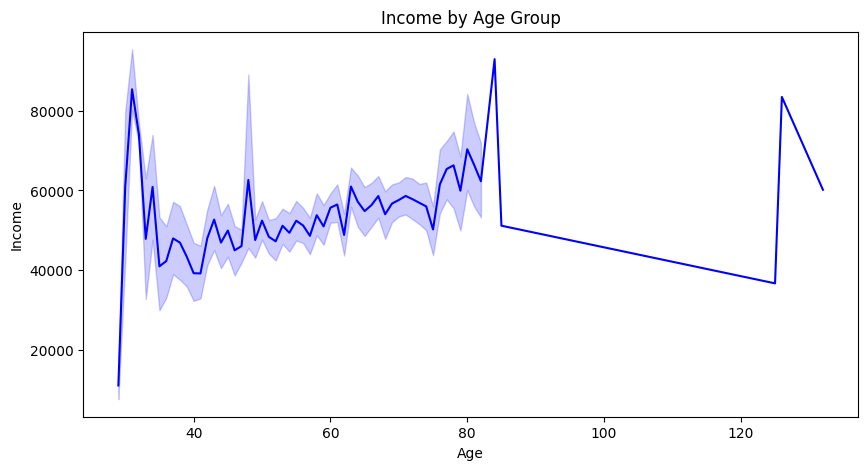

In [ ]:
# line plot of the Income vs Age
plt.figure(figsize=(10,5))
sns.lineplot(x=df["Age"], y=df['Income'], color="blue")
plt.ylabel("Income")
plt.title("Income by Age Group")
plt.show()

--->From the above line plot we can observe that the age in between `30-40` are earning more income than the others  
--->Then we can see that the `average income` is earned in the age between the `50-80`   


In [ ]:
df['Age'].unique()

array([ 68,  71,  60,  41,  44,  58,  54,  40,  51,  75,  49,  66,  73,
        38,  79,  45,  76,  43,  46,  74,  56,  36,  62,  55,  52,  82,
        50,  29,  57,  61,  48,  47,  70,  59,  37,  77,  67,  53,  65,
        42,  80,  34,  63,  72,  69,  33,  64, 125,  39, 132,  35,  78,
       126,  32,  31,  84,  81,  30,  85])

In [ ]:
# checking the no child in the house
df["Kidhome"].unique()

array([0, 1, 2])

**Purchase According to the Different platforms in the company**

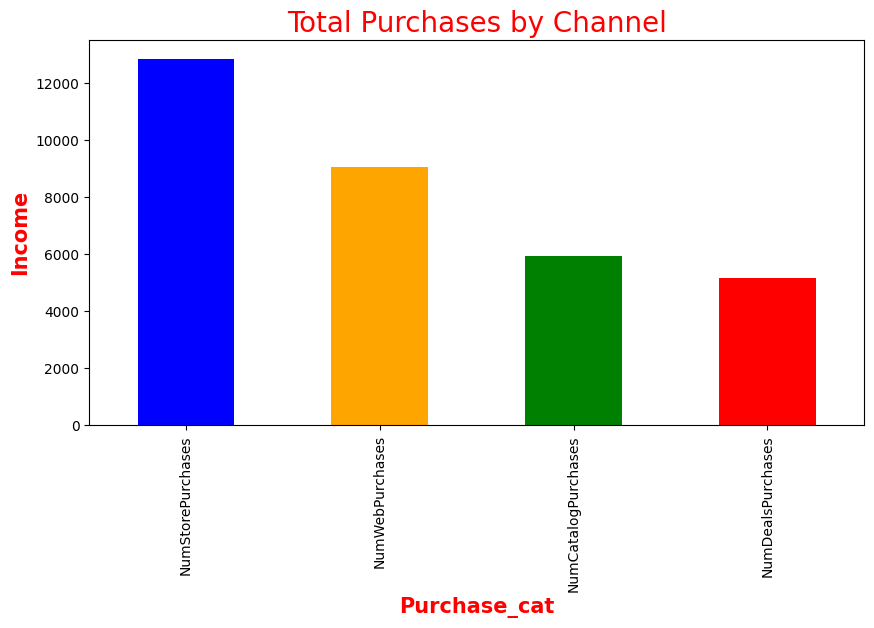

In [ ]:
plt.figure(figsize=(10,5))
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# ploting in the barplot

df[purchase_cols].sum().sort_values(ascending=False).plot(kind='bar',  color=['blue', 'orange', 'green', 'red'])
# y_lable
plt.ylabel('Income', fontsize=15, color='red',fontweight='bold')
# x_lable
plt.xlabel('Purchase_cat', fontsize=15, color='red',fontweight='bold')
# Title
plt.title("Total Purchases by Channel",fontsize=20,color="red")


plt.show()

In [ ]:
no_count=df[purchase_cols].sum().reset_index().sort_values(by=0,ascending=False)
print("\033[31m"+"Total Purchases by Channel:-",df[purchase_cols].sum().sum(),"\n")
print("\033[32m"+f"{no_count}"+"\033[5m")

Total Purchases by Channel:- 32976 

                 index      0
3    NumStorePurchases  12855
1      NumWebPurchases   9053
2  NumCatalogPurchases   5919
0    NumDealsPurchases   5149


--->From the above vissual we can see that the most of the people are made purchas in the `store`which is `12885` instead of going in another way of purchasing  
--->We can see theat the there is the least count who are purchase with the `discount` which is the `5149`  
--->The total purchase from the store is `32976`as per the data

The releation between the INCOME and the SPENDING


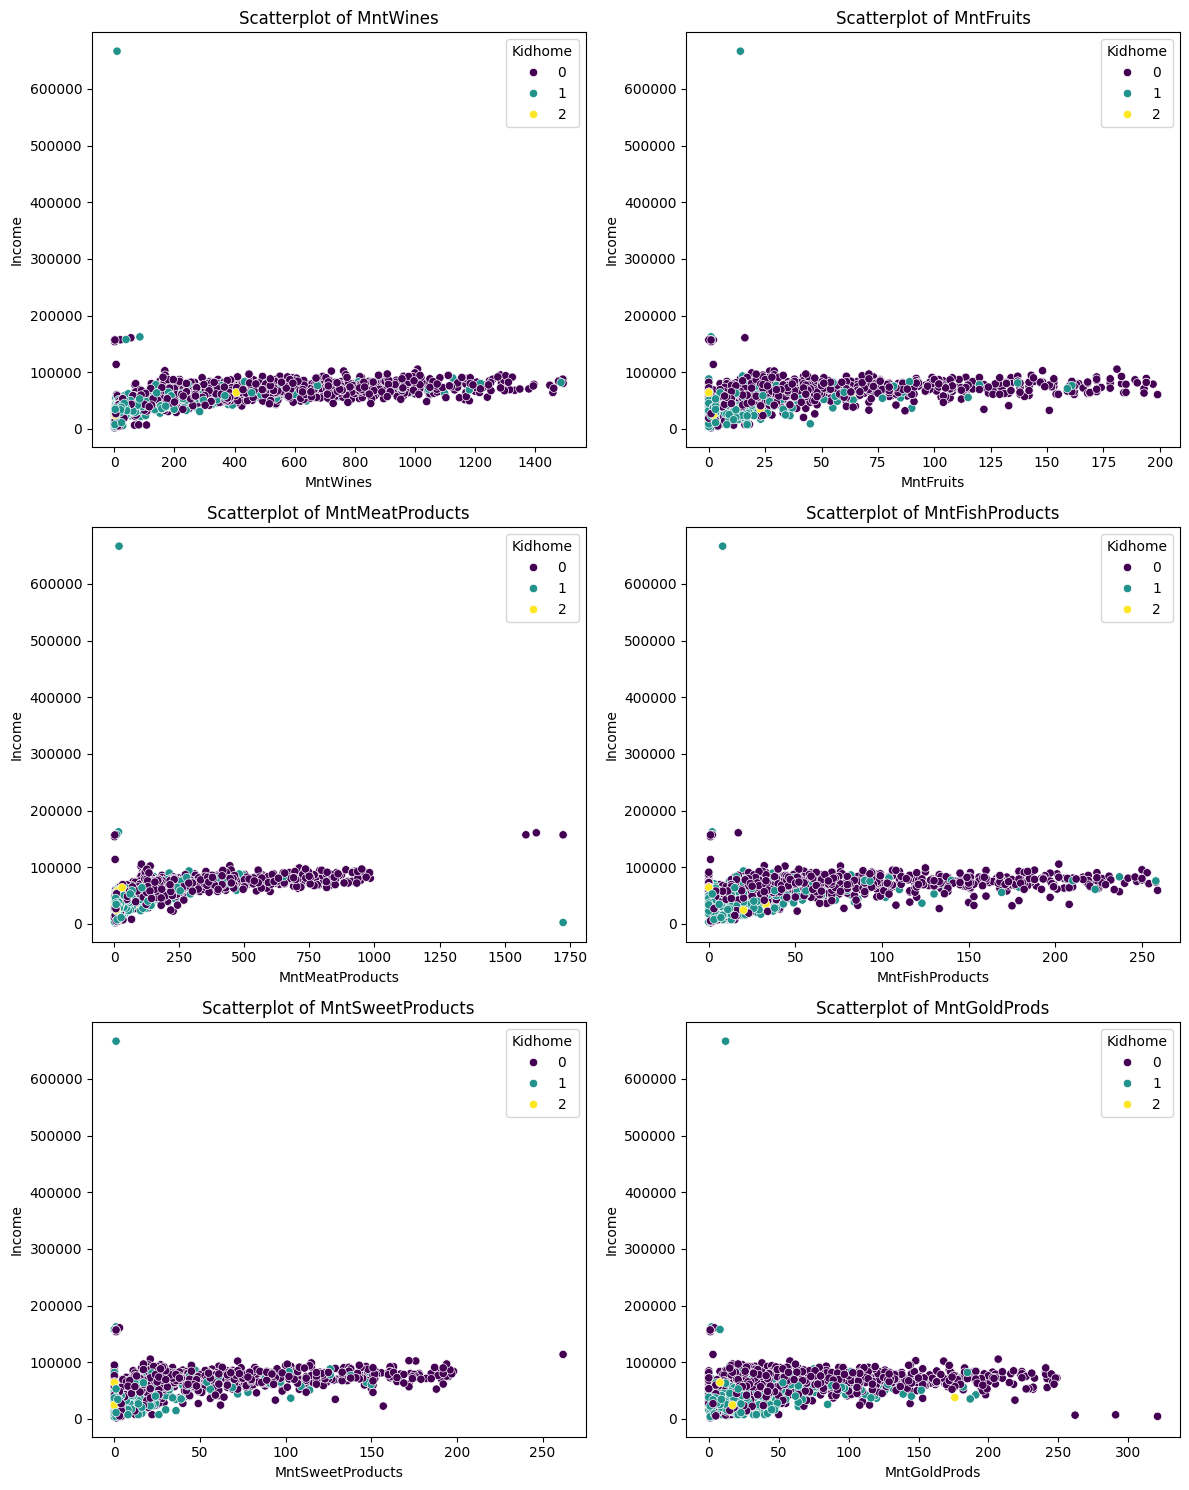

In [ ]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
n_rows = len(spending_cols) // 2 + len(spending_cols) % 2

fig = plt.figure(figsize=(12, 5 * n_rows))  # Create figure

for i, col in enumerate(spending_cols):
    plt.subplot(n_rows, 2, i + 1)  # Create subplots
    sns.scatterplot(x=df[col], y=df["Income"],hue="Kidhome",data=df,palette="viridis")  # Scatter plot
    plt.title(f'Scatterplot of {col}')  # Corrected title
print("\033[92m"+"The releation between the INCOME and the SPENDING")
plt.tight_layout()  # Adjust layout
plt.show()


---> According to the Scatter plot we can observed that the `highest purchase` of the `wine` and the who is having the `0` `childrens` they are only spending more  
---> who is with the `2` or `1` children in the home they are spending on `limit`  
--->By this we can conclude that the who are with they are spending lessa and saving money   
---> We can see that the in every compreasion only people who are not having the `chid` in their family they are spending  more

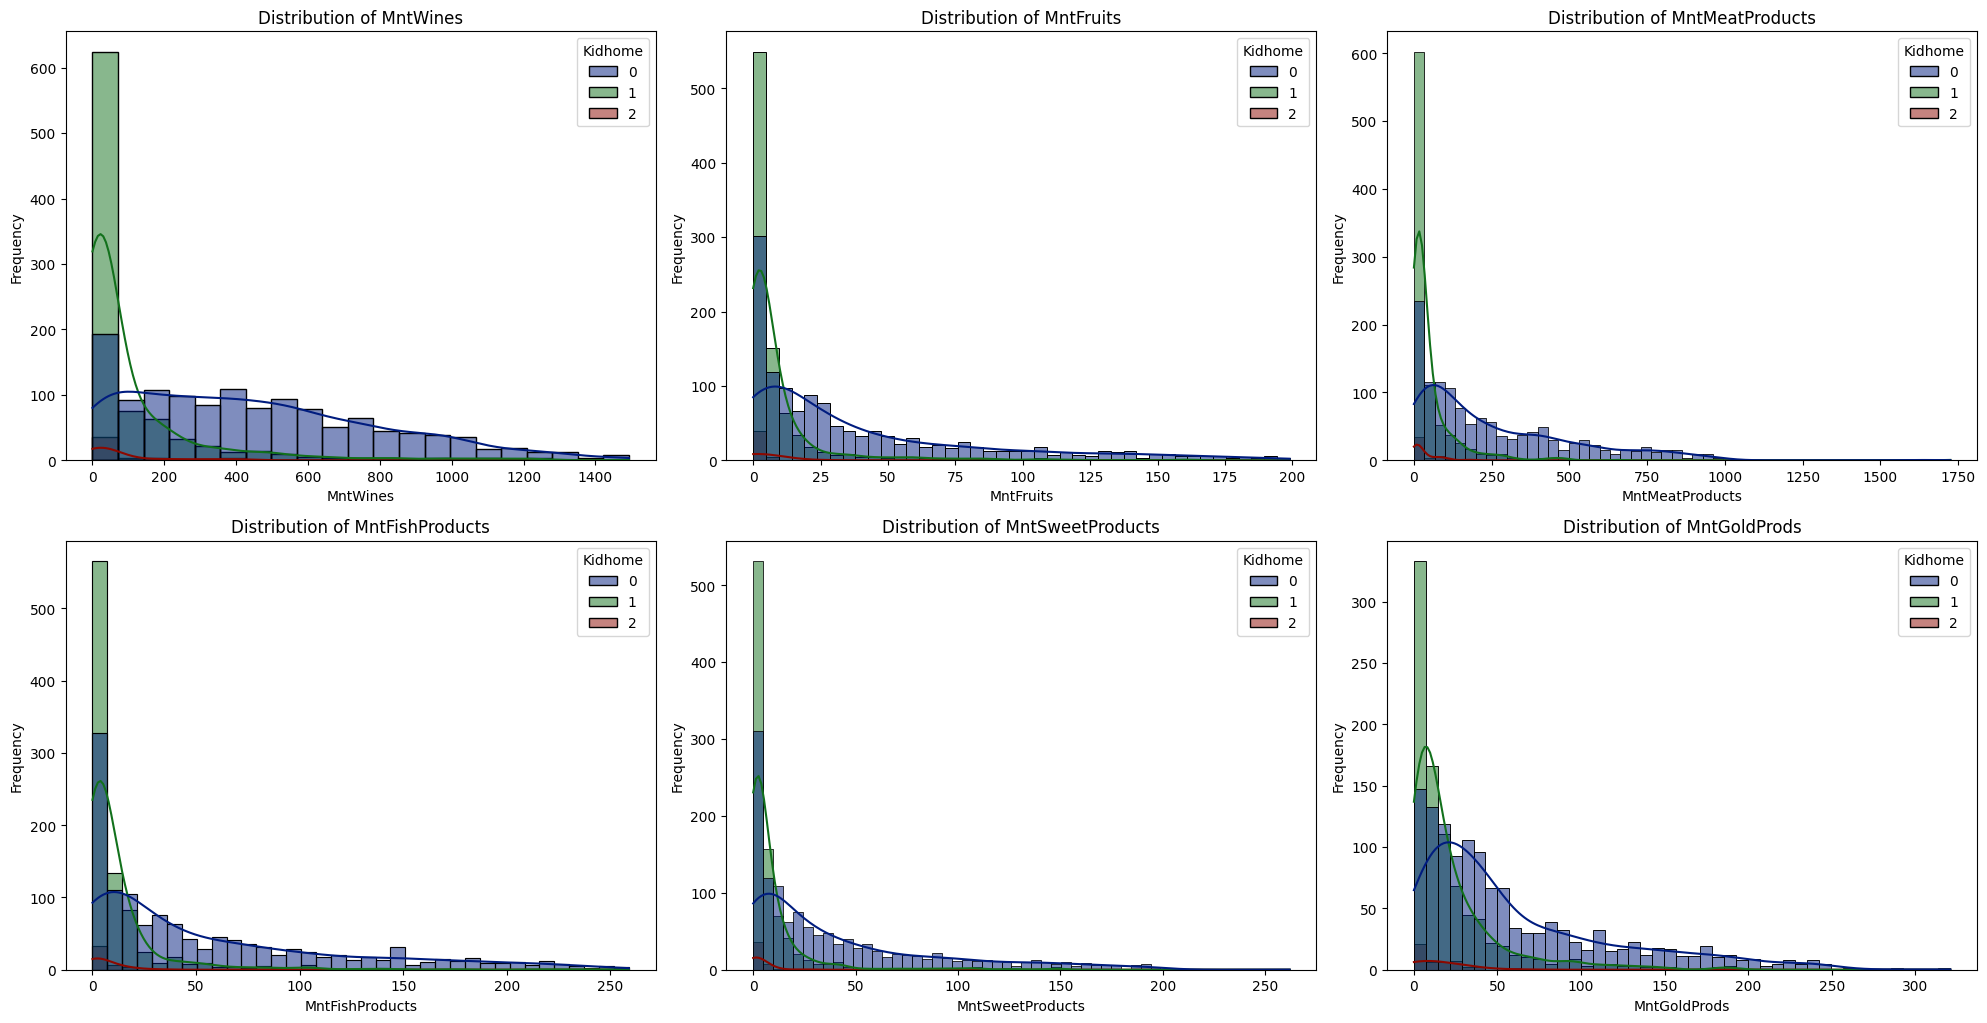

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(spending_cols):
  plt.subplot(3, 3, i + 1)
  # Change 'kidhome' to 'Kidhome' to match the actual column name
  sns.histplot(data=df, x=df[col], hue='Kidhome',kde=True, palette='dark6')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### **Deals according to the different platforms based on the childrens**

The releation of MODE of PURCHASE 


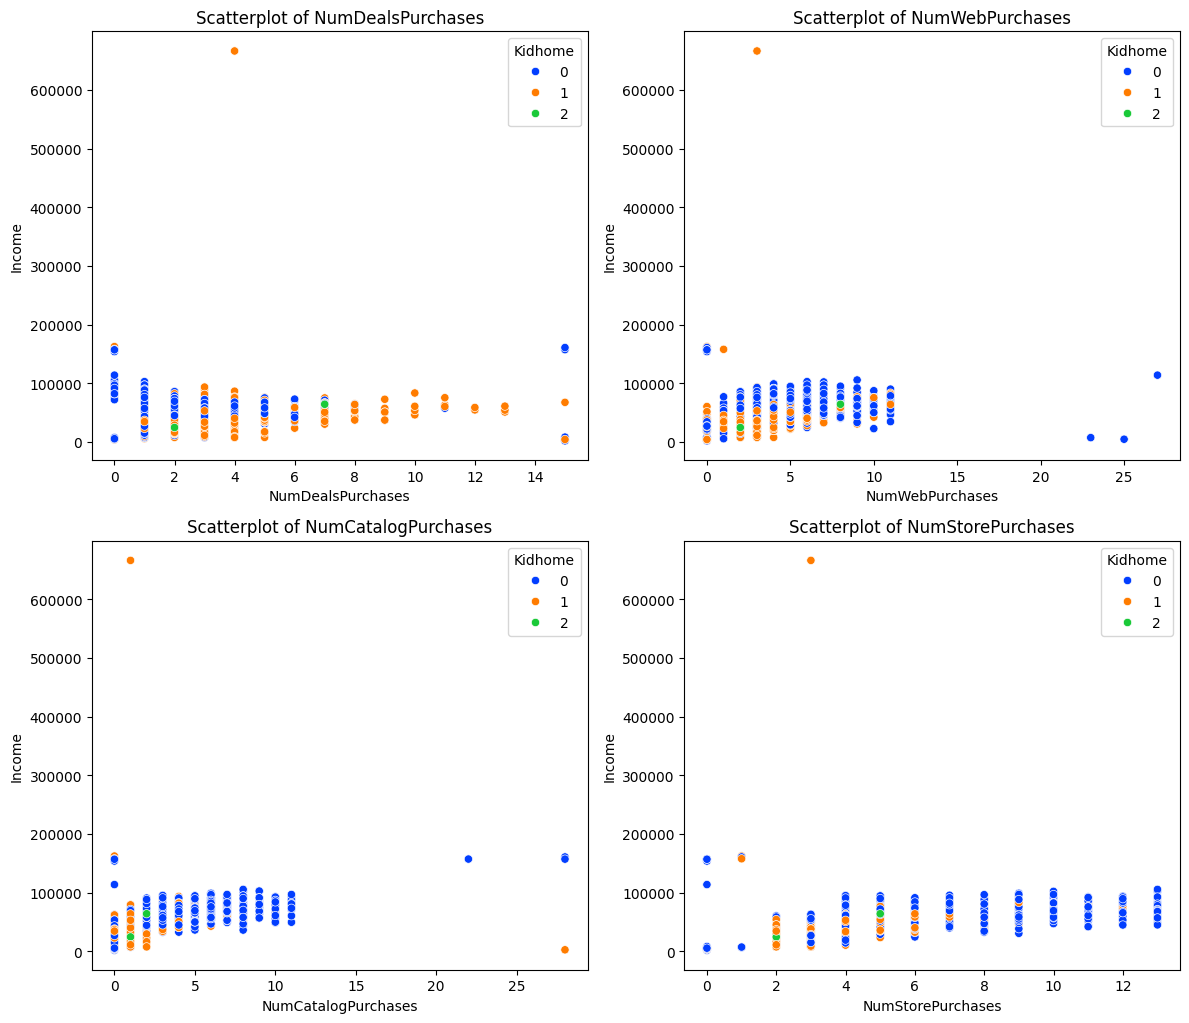

In [ ]:
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
n_rows = len(spending_cols) // 2 + len(spending_cols) % 2

# Create figure

fig = plt.figure(figsize=(12, 5 * n_rows))

for i, col in enumerate(purchase_cols):
    # Create subplots
    plt.subplot(n_rows, 2, i + 1)
     # Scatter plot
    sns.scatterplot(x=df[col], y=df["Income"],hue="Kidhome",data=df,palette="bright")
    plt.title(f'Scatterplot of {col}')  # Corrected title
print("\033[92m"+"The releation of MODE of PURCHASE ")
plt.tight_layout()  # Adjust layout
plt.show()

---> From the above data we can say the the there are the more sales through the `store` compare to  the other method and more are who is not `having the kid in home`  
---> By this we can say that the who is having the 2 childrens they are not purchasing more they are not shoping more compare to the other people

## **Finding the outliers**

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Age'],
      dtype='object')

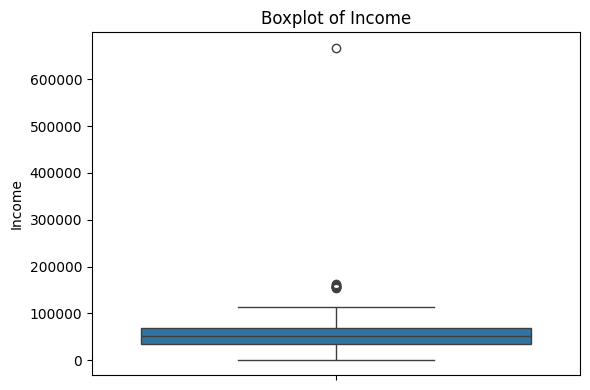

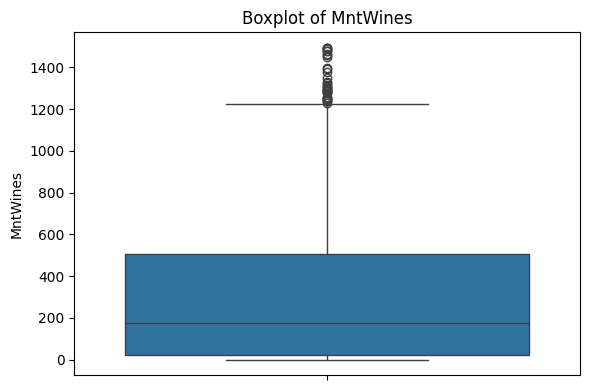

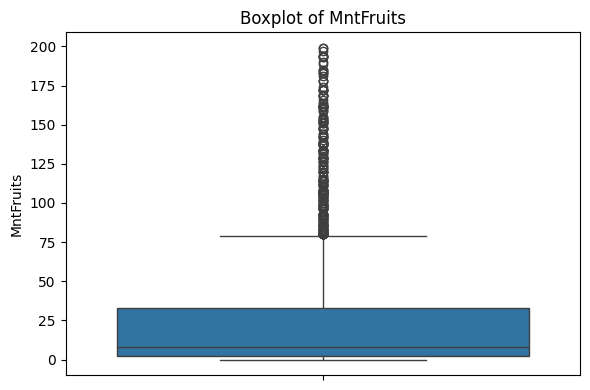

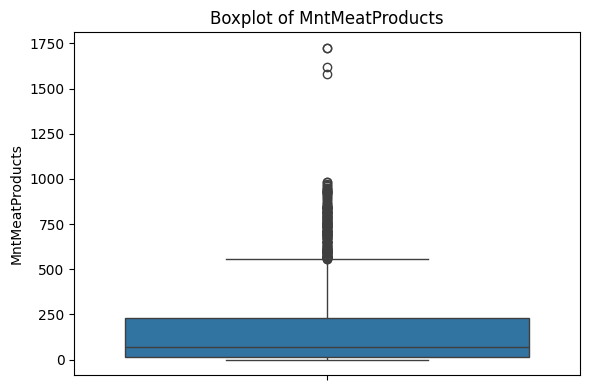

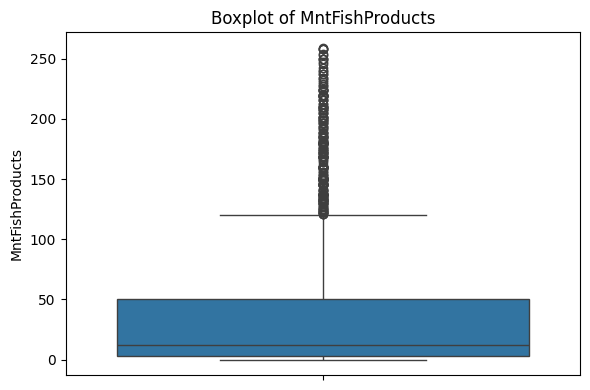

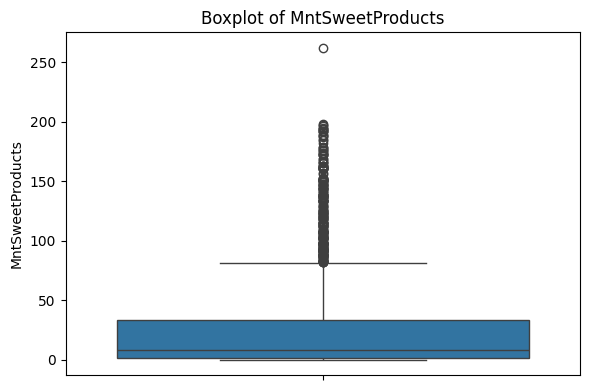

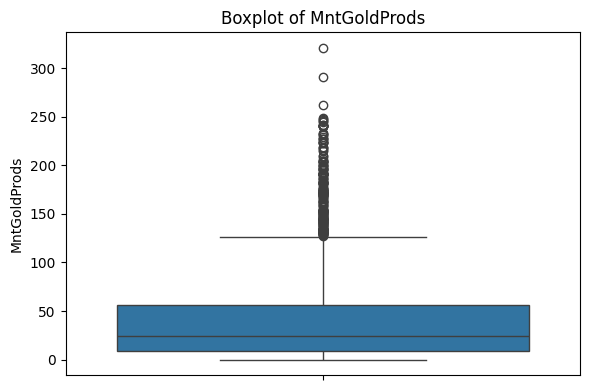

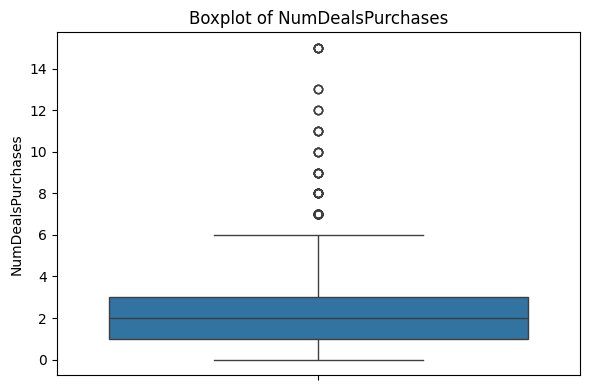

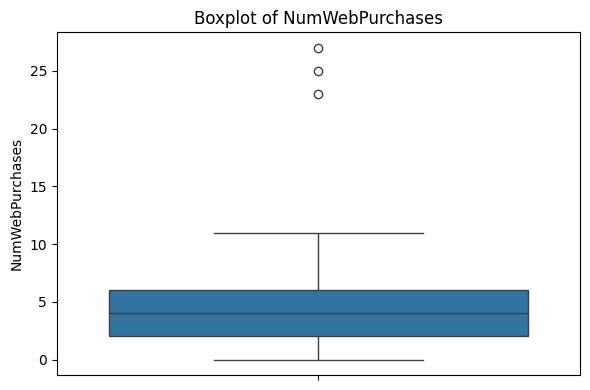

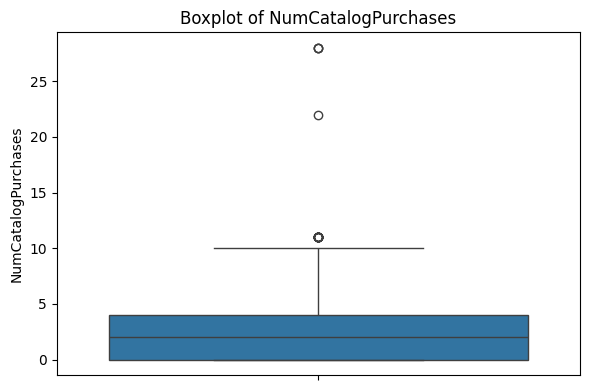

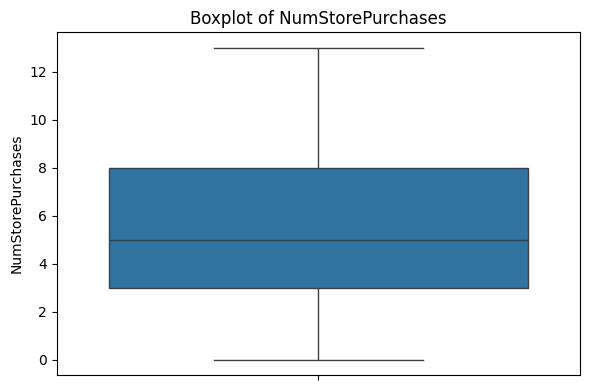

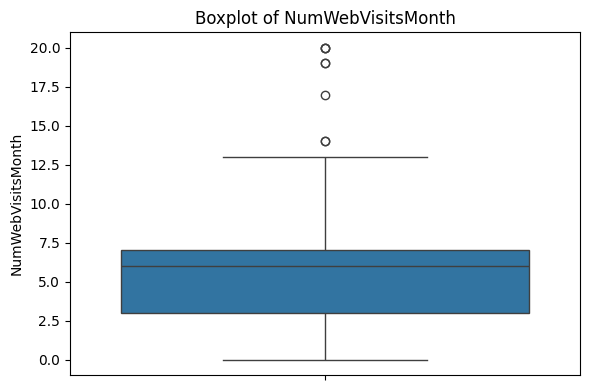

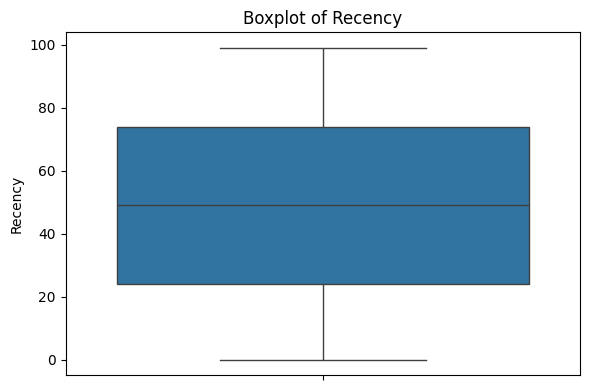

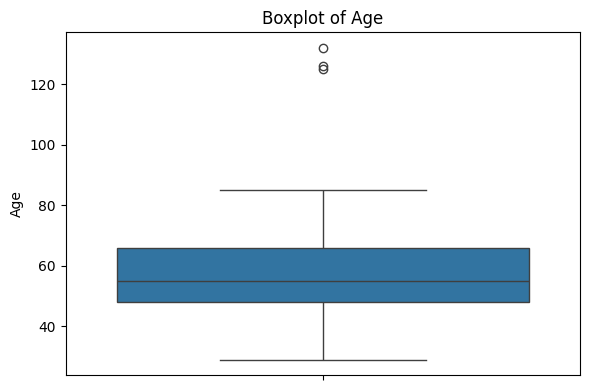

In [ ]:
num_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
               'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency', 'Age']

for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

---> We can see that the our data cointaining the `outlyers` so we will treate them with the `IQR` method

In [ ]:
for col in num_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  # inter qurtile range
  IQR = Q3 - Q1
  #Lower bound and the upper bound
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # clipping  the values based on IQR method to treat outliers.
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

**Checking for the outliers again**

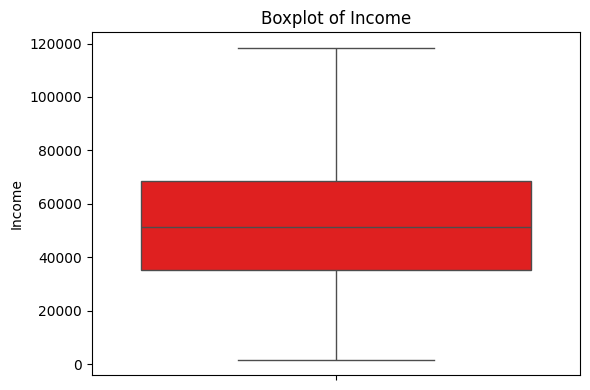

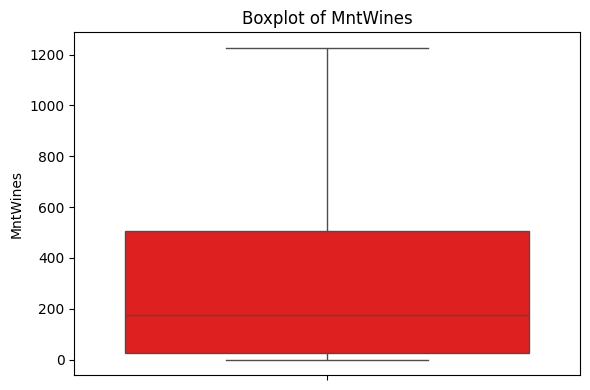

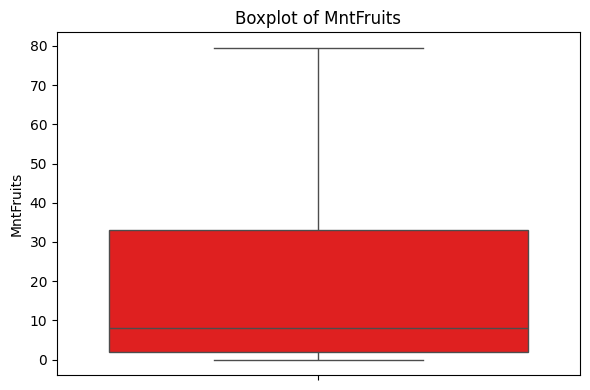

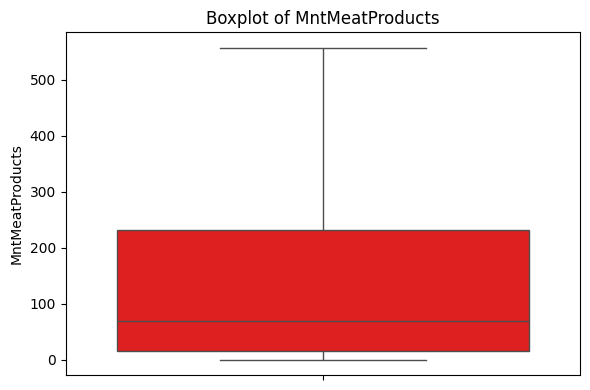

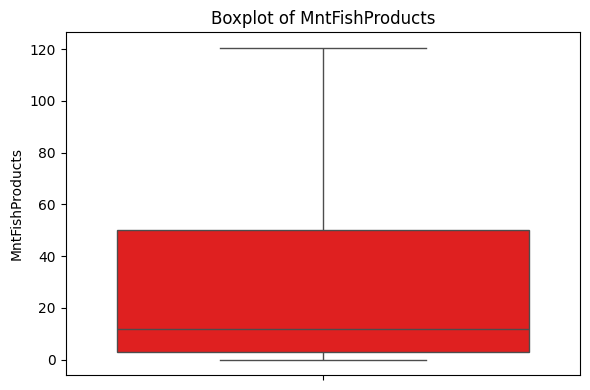

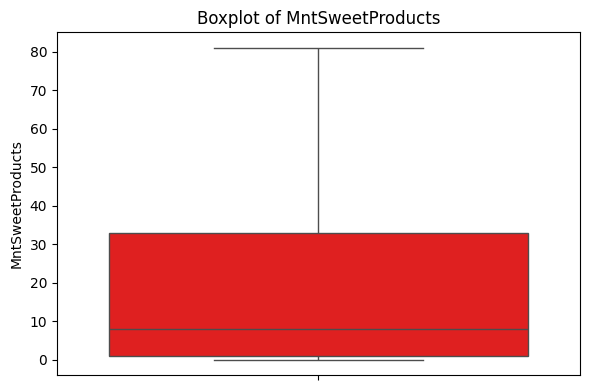

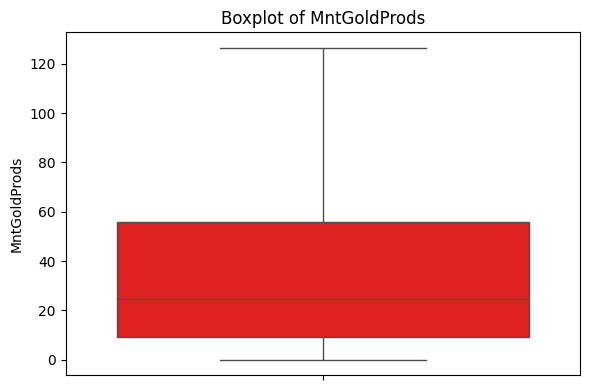

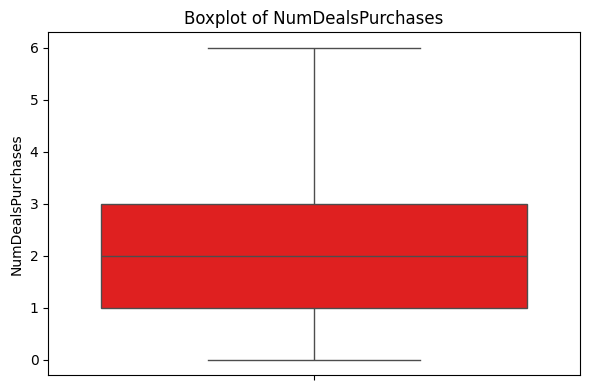

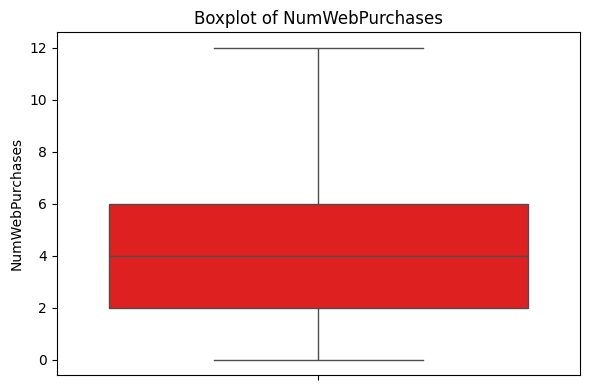

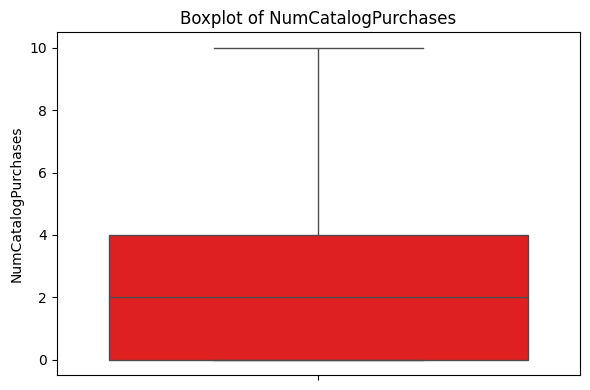

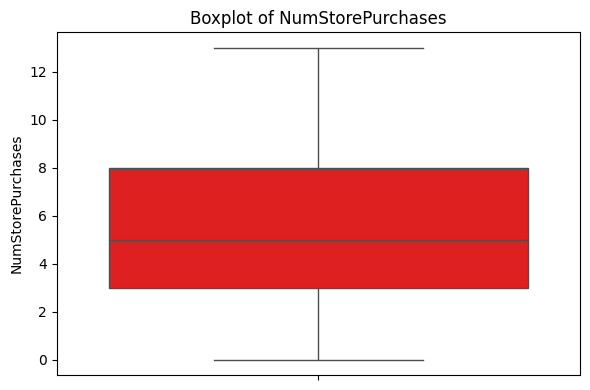

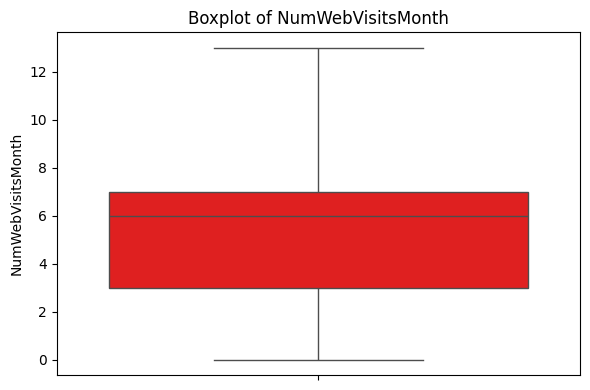

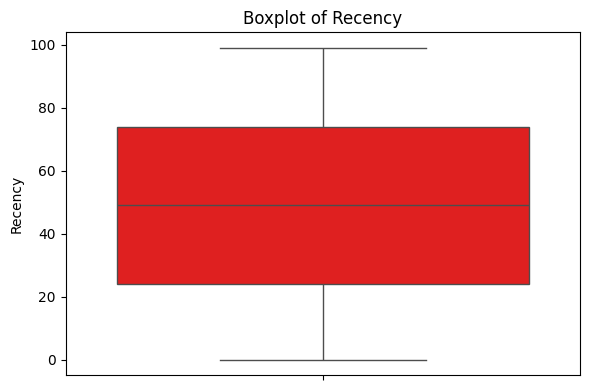

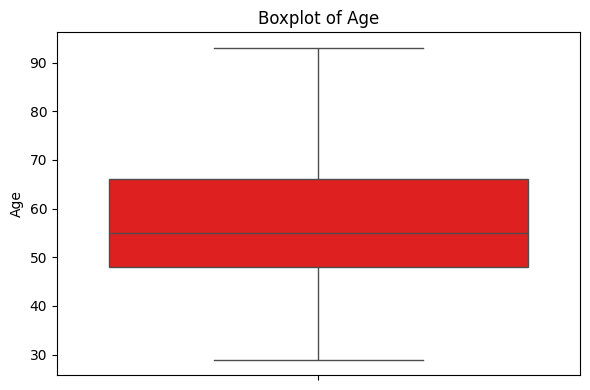

In [ ]:
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col],color="r")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

### **correleation**

In [ ]:
# seperating the numerical columns with the for loop
for col in df.columns:
  if df[col].dtype in [np.int64,np.float64]:
    print("	\033[33m"+col)

	Year_Birth
	Income
	Kidhome
	Teenhome
	Recency
	MntWines
	MntFruits
	MntMeatProducts
	MntFishProducts
	MntSweetProducts
	MntGoldProds
	NumDealsPurchases
	NumWebPurchases
	NumCatalogPurchases
	NumStorePurchases
	NumWebVisitsMonth
	Complain
	Response
	Age


In [ ]:
numerical_col=df[["Income","Kidhome","Teenhome","Recency","MntWines",
               "MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
               "MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases",
               "NumStorePurchases","NumWebVisitsMonth","Response","Age"]].corr()

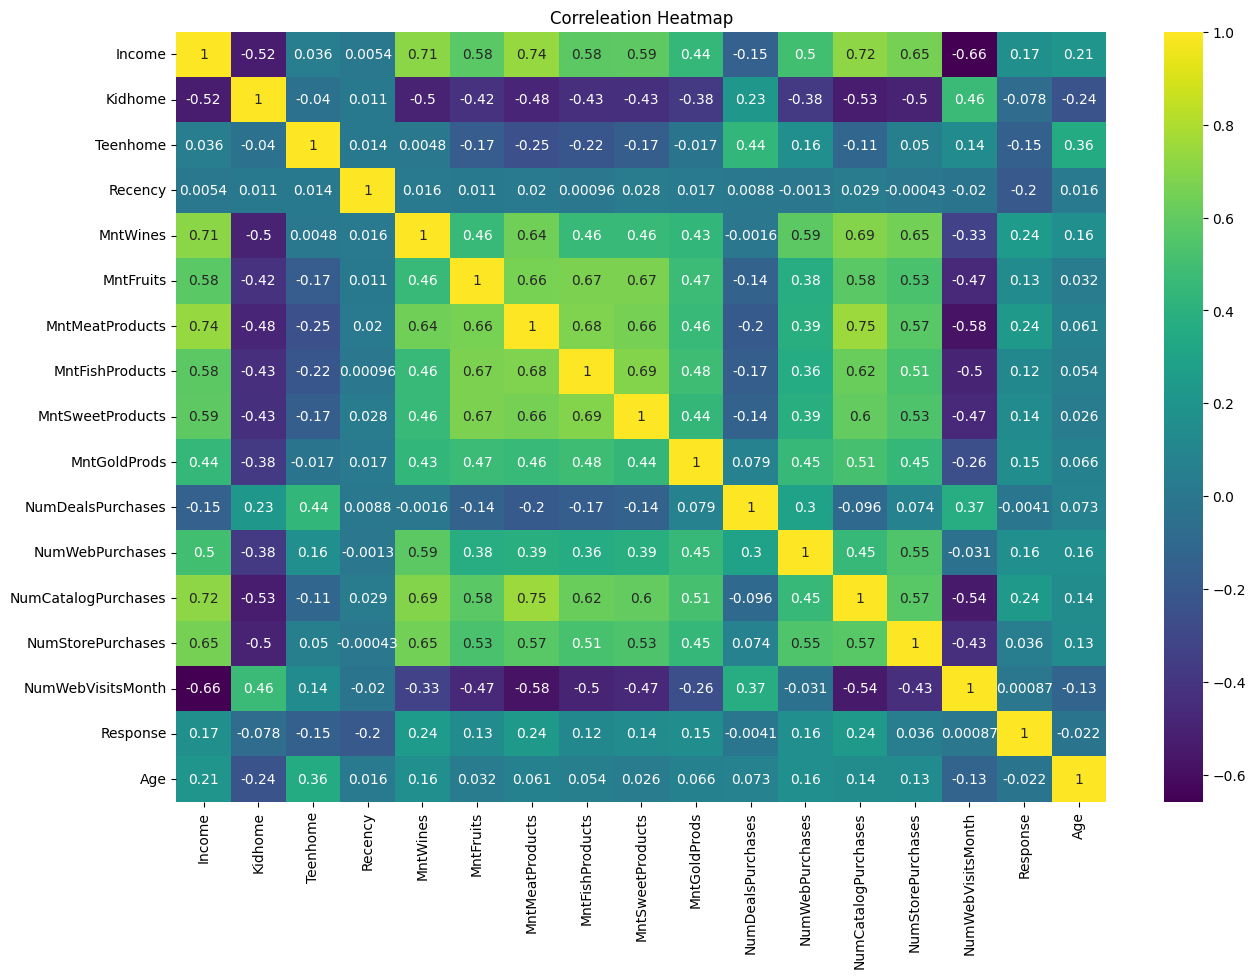

In [ ]:
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(numerical_col,annot=True,cmap="viridis")
plt.title("Correleation Heatmap")
plt.show()

---> From the above correleation we can see that the there is  no `high correleation` in the data  
   -->where this is a very good sign for the prefect data

### **Now our data is ready for the CLUSTRING**

# **KMeans**

## **Importing the needed libraries**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [ ]:
from sklearn.cluster import KMeans

-->Converting the cat variables to the numerical variables with the help of the `LabelEncoder`

In [ ]:
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])

* **Elob curve**

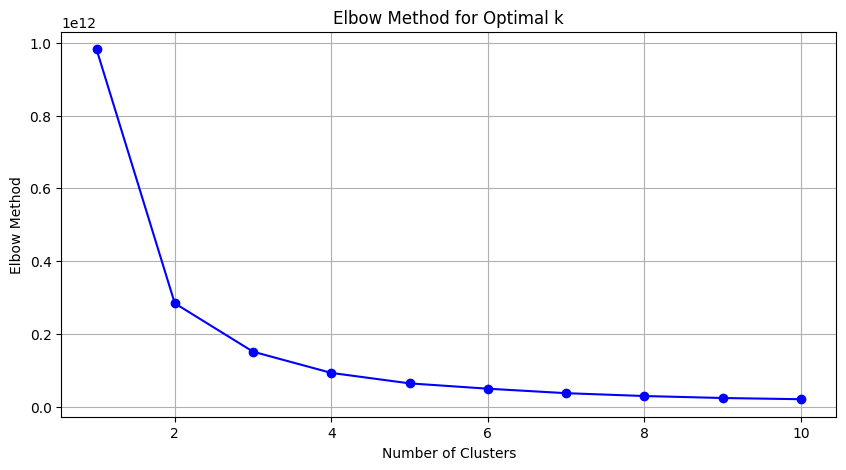

In [ ]:
elbo=[]
for i in range (1,11):
  k_mean=KMeans(n_clusters=i,random_state=42)
  k_mean.fit(df)
  elbo.append(k_mean.inertia_)

# Move the plot outside the loop
plot = plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), elbo, marker='o',  color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Method')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()


In [ ]:
print(k_mean.inertia_)

20053245259.049534


**Fitting the model using the `k-mean`**  
--> From the above plot we can select `2 clusters`

In [ ]:
k_mean=KMeans(n_clusters=2,random_state=42)
k_mean.fit(df)

KMeans(n_clusters=2, random_state=42)

In [ ]:
y_name=k_mean.predict(df)

In [ ]:
y_name # checking for the clusters

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
# we can add the clusters to the data
#df["clusters"]=y_name

In [ ]:
# chicking for the clustre centers
k_mean.cluster_centers_

array([[1.97091005e+03, 2.28924162e+00, 3.73456790e+00, 3.45293668e+04,
        7.16931217e-01, 4.73544974e-01, 4.89841270e+01, 7.86596120e+01,
        6.81349206e+00, 3.51151896e+01, 1.06887125e+01, 7.00088183e+00,
        2.17698413e+01, 2.33509700e+00, 2.72663139e+00, 8.34215168e-01,
        3.63932981e+00, 6.62081129e+00, 1.23456790e-02, 1.13756614e-01,
        5.40617284e+01],
       [1.96663031e+03, 2.50369686e+00, 3.71719039e+00, 7.00532116e+04,
        1.53419593e-01, 5.38817006e-01, 4.90425139e+01, 5.38680684e+02,
        3.70337338e+01, 2.73003812e+02, 5.47227357e+01, 3.76192237e+01,
        5.80771719e+01, 2.09149723e+00, 5.47319778e+00, 4.51756007e+00,
        8.06654344e+00, 3.91866913e+00, 6.46950092e-03, 1.88539741e-01,
        5.83031423e+01]])

In [ ]:
# checking for the colors in the cmap
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

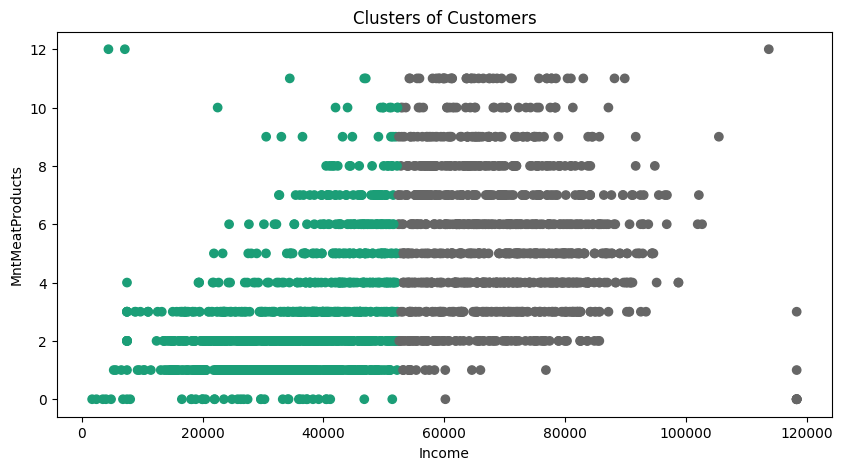

<Figure size 640x480 with 0 Axes>

In [ ]:
#ploting the clusters
# ploting the clusters
plt.figure(figsize=(10,5))
plt.scatter(df['Income'], df['NumWebPurchases'], c=y_name,cmap="Dark2")
plt.xlabel('Income')
plt.ylabel('MntMeatProducts')
plt.title('Clusters of Customers')
plt.show()
plt.tight_layout()


**Evualation metrics**

In [ ]:
# score
score=silhouette_score(df,k_mean.labels_)
print("Silhouette Score:", score)
print(f"{score:.2f}")

Silhouette Score: 0.6086701525513013
0.61


--> **Evolution matrix**

. We used the Silhouette Score to evaluate our clustering model, achieving a score of 0.60. This indicates that the clusters formed are well-defined and appropriate for the given data.

-->**Reason for not selecting Scaling**

. We did not apply scaling to the data because doing so resulted in a lower Silhouette Score of 0.50, indicating poorer cluster formation.  

-->**Reason for not selecting the PCA**

. We chose not to use PCA because it led to poorly defined clusters, further reducing the effectiveness of the clustering approach.  

# **Hieracharical**

In [ ]:
#hierarchy for the dendogram
# AgglomerativeClustering for the clustring
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

* Creating the dendogram **bold text**

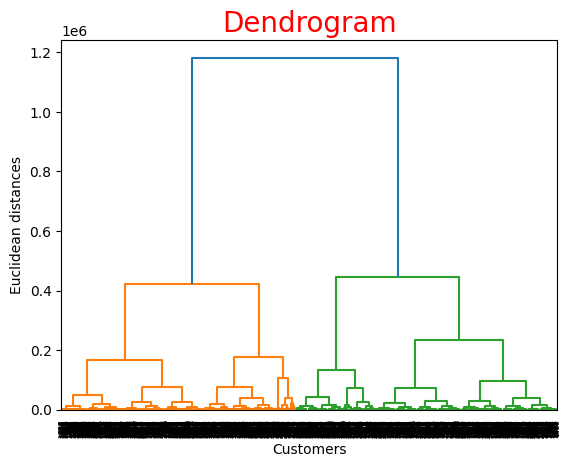

In [ ]:
#Dendogram
# There are the another methods they are the single,Complete, Average,Centroid,Ward’s Linkage

sch.dendrogram(sch.linkage(df,method='ward')) # we are using the complet linkage
plt.title('Dendrogram',color="r",fontsize=20)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
df.shape

(2216, 21)

### **Applying the Agglomerative clustring**

## * **Tuning**


In [ ]:

best_score = -1
best_params = {}

for n in range(2, 10):  # Testing different clusters
    for linkage in ["ward", "complete", "average", "single"]:
        model = AgglomerativeClustering(n_clusters=n, linkage=linkage)
        labels = model.fit_predict(df)
        score = silhouette_score(df, labels)

        if score > best_score:
            best_score = score
            best_params = {"n_clusters": n, "linkage": linkage}

print(f"Best Params: {best_params}, Best Silhouette Score: {best_score}")


Best Params: {'n_clusters': 2, 'linkage': 'ward'}, Best Silhouette Score: 0.6076145917079443


In [ ]:
# applying the AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=2, linkage='ward')
ag.fit(df)

AgglomerativeClustering()

In [ ]:
y_agg=ag.fit_predict(df)

In [ ]:
# converting the clusters into the data frame
clusters=pd.DataFrame(y_agg,columns=["clusters"])
clusters # checking for the clusters

,clusters
0,1
1,0
2,1
3,0
4,1
...,...
2211,1
2212,1
2213,1
2214,1


In [ ]:
#['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'berlin_r', 'managua_r', 'vanimo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral_r', 'Wistia_r', 'YlGn_r', 'YlGnBu_r', 'YlOrBr_r', 'YlOrRd_r', 'afmhot_r', 'autumn_r', 'binary_r', 'bone_r', 'brg_r', 'bwr_r', 'cool_r', 'coolwarm_r', 'copper_r', 'cubehelix_r', 'flag_r', 'gist_earth_r', 'gist_gray_r', 'gist_heat_r', 'gist_ncar_r', 'gist_rainbow_r', 'gist_stern_r', 'gist_yarg_r', 'gnuplot_r', 'gnuplot2_r', 'gray_r', 'hot_r', 'hsv_r', 'jet_r', 'nipy_spectral_r', 'ocean_r', 'pink_r', 'prism_r', 'rainbow_r', 'seismic_r', 'spring_r', 'summer_r', 'terrain_r', 'winter_r', 'Accent_r', 'Dark2_r', 'Paired_r', 'Pastel1_r', 'Pastel2_r', 'Set1_r', 'Set2_r', 'Set3_r', 'tab10_r', 'tab20_r', 'tab20b_r', 'tab20c_r', 'grey_r', 'gist_grey_r', 'gist_yerg_r', 'Grays_r', 'rocket', 'rocket_r', 'mako', 'mako_r', 'icefire', 'icefire_r', 'vlag', 'vlag_r', 'flare', 'flare_r', 'crest', 'crest_r']

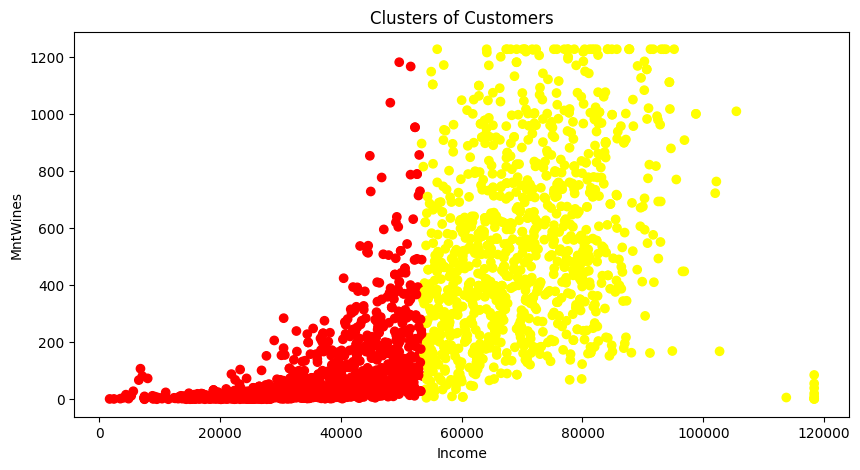

<Figure size 640x480 with 0 Axes>

In [ ]:
# ploting the clusters
plt.figure(figsize=(10,5))
plt.scatter(df['Income'], df['MntWines'], c=clusters['clusters'], cmap='autumn')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.title('Clusters of Customers')
plt.show()
plt.tight_layout()


In [ ]:
score=silhouette_score(df,ag.labels_)
print("Silhouette Score:", score)
print(f"{score:.2f}")

Silhouette Score: 0.6076145917079443
0.61


## **DBSCAN(Density base spatial clustring of application with noise)**

In [ ]:
# Importing the libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors as nb

* Checking for the data size **bold text**

In [ ]:
df.shape

(2216, 21)

**Ploting**

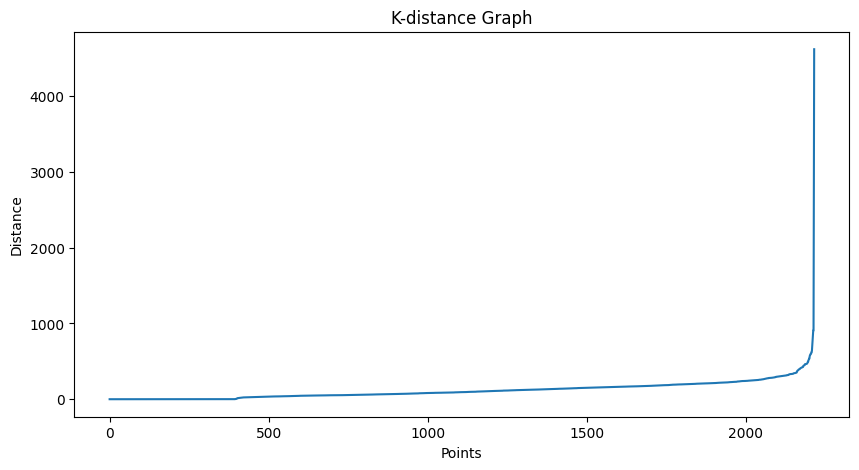

In [ ]:
nei=nb(n_neighbors=2,metric='euclidean').fit(df)
distances,indices=nei.kneighbors(df)
distance=np.sort(distances[:,1],axis=0)
plt.figure(figsize=(10,5))
plt.plot(distance)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-distance Graph')
plt.show()

## **Applying the DBSCAN**

In [ ]:
dbscan=DBSCAN(eps=0.25,min_samples=21)
dbscan.fit(df)


DBSCAN(eps=0.25, min_samples=21)

In [ ]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

### **Evaluation metrics**

In [ ]:
from sklearn.metrics import silhouette_score
if len(set(dbscan.labels_)) > 1:
    score = silhouette_score(df, dbscan.labels_)
    print("Silhouette Score:", score)
else:
    print("DBSCAN found only one cluster or all points are noise.")


DBSCAN found only one cluster or all points are noise.


### **Conclusion**

-->**In the above DBSCAN results, only one cluster was formed, which is why we cannot compute a meaningful clustering score**.  

-->**For certain datasets, DBSCAN may not be effective. In such cases, K-Means clustering could be a better alternative**.  

-->**DBSCAN is not well-suited for large datasets, as it may struggle to form well-defined clusters**.

## **Regression Model**

### **Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report, confusion_matrix

In [ ]:
# Load the dataset
file_path = "/content/marketing_campaign1.xlsx"
df1 = pd.read_excel(file_path)

In [ ]:
# Drop unnecessary columns
df_cleaned = df1.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',"Year_Birth"],inplace=True)


In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.dropna(inplace=True,axis=1)


In [ ]:
df1.reset_index(drop=True, inplace=True)

In [ ]:
# Create a LabelEncoder
encoder = LabelEncoder()

In [ ]:
df1['Education'] = encoder.fit_transform(df1['Education'])

In [ ]:
df1['Marital_Status'] = encoder.fit_transform(df1['Marital_Status'])

**Splitting the data**

In [ ]:
x=df1.drop(["Complain"],axis=1)
y=df1['Complain']

In [ ]:
x

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,2,4,0,0,58,635,88,546,172,88,...,8,10,4,7,0,0,0,0,0,1
1,2,4,1,1,38,11,1,6,2,1,...,1,1,2,5,0,0,0,0,0,0
2,2,5,0,0,26,426,49,127,111,21,...,8,2,10,4,0,0,0,0,0,0
3,2,5,1,0,26,11,4,20,10,3,...,2,0,4,6,0,0,0,0,0,0
4,4,3,1,0,94,173,43,118,46,27,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0,1,46,709,43,182,42,118,...,9,3,4,5,0,0,0,0,0,0
2236,4,5,2,1,56,406,0,30,0,0,...,8,2,5,7,0,0,0,1,0,0
2237,2,2,0,0,91,908,48,217,32,12,...,2,3,13,6,0,1,0,0,0,0
2238,3,5,0,1,8,428,30,214,80,30,...,6,5,10,3,0,0,0,0,0,0


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predictions
y_pred = log_reg.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)

In [ ]:
# Print results
print(f"Accuracy: {accuracy:.2f}")
print("~"*50)
print("Confusion Matrix:\n", conf_matrix)
print("~"*50)
print("Classification Report:\n", class_report)
print("~"*50)
print(f"Precision: {precision:.2f}")
print("~"*50)
print(f"Recall: {recall:.2f}")
print("~"*50)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.99
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Confusion Matrix:
 [[444   0]
 [  4   0]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       444
           1       0.00      0.00      0.00         4

    accuracy                           0.99       448
   macro avg       0.50      0.50      0.50       448
weighted avg       0.98      0.99      0.99       448

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Precision: 0.00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Recall: 0.00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
F1 Score: 0.00


In [ ]:
import pickle
with open('logistic_model.pkl', 'wb') as model_file:
    pickle.dump(log_reg, model_file)


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
df1

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,2,4,0,0,58,635,88,546,172,88,...,10,4,7,0,0,0,0,0,0,1
1,2,4,1,1,38,11,1,6,2,1,...,1,2,5,0,0,0,0,0,0,0
2,2,5,0,0,26,426,49,127,111,21,...,2,10,4,0,0,0,0,0,0,0
3,2,5,1,0,26,11,4,20,10,3,...,0,4,6,0,0,0,0,0,0,0
4,4,3,1,0,94,173,43,118,46,27,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0,1,46,709,43,182,42,118,...,3,4,5,0,0,0,0,0,0,0
2236,4,5,2,1,56,406,0,30,0,0,...,2,5,7,0,0,0,1,0,0,0
2237,2,2,0,0,91,908,48,217,32,12,...,3,13,6,0,1,0,0,0,0,0
2238,3,5,0,1,8,428,30,214,80,30,...,5,10,3,0,0,0,0,0,0,0


In [ ]:


# Define the script content
script = """import streamlit as st
import pickle
import numpy as np

# Load the trained model
with open('logistic_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

st.title('🧠 Customer Segmentation Prediction App')

# ---- Personal Information ----
st.header("👤 Personal Information")
col1, col2, col3 = st.columns(3)
with col1:
    Education = st.selectbox('Education Level', ['Basic', 'Graduation', 'PhD', 'Master', '2n Cycle'])
with col2:
    Marital_Status = st.selectbox('Marital Status', ['Single', 'Married', 'Divorced', 'Widow', 'Together'])
with col3:
    Income = st.number_input('Annual Income (€)', value=0.0)

# ---- Family & Membership ----
st.header("👪 Family & Membership")
col1, col2, col3 = st.columns(3)
with col1:
    Kidhome = st.number_input('No. of Kids', value=0, min_value=0)
with col2:
    Teenhome = st.number_input('No. of Teenagers', value=0, min_value=0)
with col3:
    Recency = st.number_input('Days Since Last Purchase', value=0)

# ---- Spending ----
st.header("🛒 Spending on Products")
col1, col2, col3 = st.columns(3)
with col1:
    MntWines = st.number_input('Wine (€)', value=0)
    MntMeatProducts = st.number_input('Meat (€)', value=0)
with col2:
    MntFruits = st.number_input('Fruits (€)', value=0)
    MntFishProducts = st.number_input('Fish (€)', value=0)
with col3:
    MntSweetProducts = st.number_input('Sweets (€)', value=0)
    MntGoldProds = st.number_input('Gold (€)', value=0)

# ---- Purchases ----
st.header("🛍️ Purchases")
col1, col2, col3 = st.columns(3)
with col1:
    NumDealsPurchases = st.number_input('Deals', value=0)
    NumCatalogPurchases = st.number_input('Catalog', value=0)
with col2:
    NumWebPurchases = st.number_input('Web', value=0)
    NumStorePurchases = st.number_input('In-Store', value=0)
with col3:
    NumWebVisitsMonth = st.number_input('Web Visits/Month', value=0)

# ---- Campaigns ----
st.header("📢 Campaign Responses")
col1, col2, col3 = st.columns(3)
with col1:
    AcceptedCmp1 = st.checkbox('Campaign 1')
    AcceptedCmp2 = st.checkbox('Campaign 2')
with col2:
    AcceptedCmp3 = st.checkbox('Campaign 3')
    AcceptedCmp4 = st.checkbox('Campaign 4')
with col3:
    AcceptedCmp5 = st.checkbox('Campaign 5')
    Complain = st.checkbox('Customer Complained')

# ---- Overall Response ----
st.header("📈 Overall")
Response = st.checkbox('Responded to Campaign')

# --- Convert categorical values ---
Education_map = {'Basic': 0, 'Graduation': 1, 'PhD': 2, 'Master': 3, '2n Cycle': 4}
Marital_Status_map = {'Single': 0, 'Married': 1, 'Divorced': 2, 'Widow': 3, 'Together': 4}

Education = Education_map[Education]
Marital_Status = Marital_Status_map[Marital_Status]

# --- Convert checkboxes to int ---
AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 = map(int, [AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5])
Complain = int(Complain)
Response = int(Response)

# --- Prepare input ---

input_data = np.array([[Education, Marital_Status, Income, Kidhome, Teenhome,
                        Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts,
                        MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases,
                        NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth,
                        AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5]])


# --- Predict ---
if st.button('🔍 Predict Complaint Risk'):
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.error('⚠️ This customer is likely to **file a complaint**.')
    else:
        st.success('✅ This customer is **not likely to complain**.')

st.markdown("---")
st.subheader("⭐ Rate This App")

rating = st.slider('How would you rate your experience?', min_value=1, max_value=5, value=3)

if st.button("Submit Rating"):
    if rating >= 3:
        st.success(f"🎉 Thank you for rating us {rating} out of 5!")
        st.write("We appreciate your feedback!")
        st.balloons()
    else:
        st.warning(f"Thank you for rating us {rating} out of 5.")
        st.write("We will work on improving the app. 😞")



"""




with open("coustomer.py", "w") as f:
    # Write the script content to the file
    f.write(script)